# OBJECTIVE : 

1.   APPLYING DECISION TREE WITH TFIDF_AVG_WORD_2_VEC VECTORIZATION<font color=RebeccaPurple>

 *   FINDING THE BEST HYPERPARAMETER USING GRIDSEARCHCV WITH TRAIN DATA AND CROSS-VALIDATION DATA BY PLOTTING THE RESLUTS OF VAROIUS TRAIN DATA AND CROSS VALIDATION DATA
 * USING THE APROPRIATE VALUE OF HYPERPARAMETER ,TESTING ACCURACY ON TEST DATA
    USING F1-SCORE
 * PLOTTING THE CONFUSION MATRIX TO GET THE  PRECISOIN ,RECALL VALUE WITH HELP OF HEATMAP #


In [0]:
from sklearn.model_selection import train_test_split          #importing the necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import *
from sklearn import naive_bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
from sklearn import *
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from gensim.models import Word2Vec
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')#geeting the content from the google drive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
final_processed_data=pd.read_csv("gdrive/My Drive/final_new_data.csv")#loading the preprocessed data  with 100k points into dataframe 

In [4]:
# getting the counts of 0 and 1 in "SCORE" column to know whether it is unbalanced data or not
count_of_1=0
count_of_0=0
for i in final_processed_data['Score']:
   if i==1:
    count_of_1+=1
   else:
    count_of_0+=1
print(count_of_1)
print(count_of_0)
#it is an imbalanced dataset

88521
11479


In [0]:
#spliiting the data into train and test data
x_train,x_test,y_train,y_test=model_selection.train_test_split(final_processed_data['CleanedText'].values,final_processed_data['Score'].values,test_size=0.2,shuffle=False)

In [6]:
# Training my own Word2Vec model using your own text corpus
list_of_sent=[]
for sent in x_train:
 list_of_sent.append(sent.split())#splitting of sentences into words AND appending them to list
print(x_train[0])
print("*****************************************************************")
print(list_of_sent[0])
word_to_vector=Word2Vec(list_of_sent,min_count=5,size=100,workers=2)#constructing my our word to vector
w_t_c_words=list(word_to_vector.wv.vocab)
print("***********************************************************************")
print("sample words ", w_t_c_words[0:50])

witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg
*****************************************************************
['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'book', 'introduc', 'silli', 'classic', 'book', 'will', 'bet', 'son', 'still', 'abl', 'recit', 'memori', 'colleg']
***********************************************************************
sample words  ['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'india', 'droop', 'love', 'new', 'word', 'introduc', 'silli', 'classic', 'will', 'bet', 'still', 'abl', 'memori', 'colleg', 'rememb', 'see', 'show', 'air', 'televis', 'year', 'ago', 'child', 'sister', 'later', 'bought', 'd

In [7]:
###### NOW STARTING TFIDF WORD TO VEC FOR TRAIN DATA#################################################################
#NOW STARTING TF-IDF WEIGHTED WORD-TO-VEC
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(x_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))
train_tfidf_sent_vectors =[]# the tfidf-w2v for each sentence/review is stored in this list

for sent in tqdm(list_of_sent): # for each review/sentence
  sent_vec = np.zeros(100) # as word vectors are of zero length
  weight_sum =0; # num of words with a valid vector in the sentence/review
  for word in sent: # for each word in a review/sentence
   if word in w_t_c_words:
     vec = word_to_vector.wv[word]
     tf_idf = dictionary[word]*(sent.count(word)/len(sent))# dictionary[word] = idf value of word in whole courpus
     sent_vec += (vec * tf_idf)# sent.count(word) = tf valeus of word in this review
     weight_sum += tf_idf 
  if weight_sum != 0:
   sent_vec /= weight_sum
   train_tfidf_sent_vectors.append(sent_vec)

100%|██████████| 80000/80000 [06:01<00:00, 221.25it/s]


In [8]:
from sklearn.preprocessing import StandardScaler #standarizing the training  data  
x_train_data=StandardScaler( with_mean=False).fit_transform(train_tfidf_sent_vectors)
print(x_train_data.shape)

(80000, 100)


In [9]:
list_of_sent=[]
for sent in x_test:
 list_of_sent.append(sent.split())#splitting of sentences into words AND appending them to list
print(x_test[0])
print("*****************************************************************")
print(list_of_sent[0])
print('*******************************************************************')


hard find item dont buy mani either came stale got way quick classic nonetheless
*****************************************************************
['hard', 'find', 'item', 'dont', 'buy', 'mani', 'either', 'came', 'stale', 'got', 'way', 'quick', 'classic', 'nonetheless']
*******************************************************************


In [10]:
###### NOW STARTING TFIDF WORD TO VEC FOR TEST DATA#################################################################
#NOW STARTING TF-IDF WEIGHTED WORD-TO-VEC
model = TfidfVectorizer()
model.fit_transform(x_train)
model.transform(x_test)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))
test_tfidf_sent_vectors =[]# the tfidf-w2v for each sentence/review is stored in this list

for sent in tqdm(list_of_sent): # for each review/sentence
  sent_vec = np.zeros(100) # as word vectors are of zero length
  weight_sum =0; # num of words with a valid vector in the sentence/review
  for word in sent: # for each word in a review/sentence
   if word in w_t_c_words:
     vec = word_to_vector.wv[word]
     tf_idf = dictionary[word]*(sent.count(word)/len(sent))# dictionary[word] = idf value of word in whole courpus
     sent_vec += (vec * tf_idf)# sent.count(word) = tf valeus of word in this review
     weight_sum += tf_idf
  if weight_sum != 0:
   sent_vec /= weight_sum
   test_tfidf_sent_vectors.append(sent_vec)

100%|██████████| 20000/20000 [01:11<00:00, 278.93it/s]


In [11]:
from sklearn.preprocessing import StandardScaler #standarizing the training  data  
x_test_data=StandardScaler( with_mean=False).fit_transform(test_tfidf_sent_vectors)
print(x_test_data.shape)

(20000, 100)


In [0]:
#using time series split method for cross-validation score
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5) 
from sklearn.tree import DecisionTreeClassifier




In [13]:
#biudling the model
dt=DecisionTreeClassifier(criterion='gini', splitter='best',class_weight={1:.5,0:.5})
tuned_parameters=[{'max_depth':[5,7,10,15,50],'min_samples_split':[5,25,50,100,500]}]
#applying the model of decision tree and using gridsearchcv to find the best hyper parameter
%time
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(dt, tuned_parameters, scoring = 'f1', cv=tscv,n_jobs=-1)#building the gridsearchcv model


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


In [14]:
%%time
model.fit(x_train_data, y_train)#fiitting the training data

CPU times: user 6.86 s, sys: 192 ms, total: 7.05 s
Wall time: 8min 57s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight={1: 0.5, 0: 0.5}, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'max_depth': [5, 7, 10, 15, 50], 'min_samples_split': [5, 25, 50, 100, 500]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [15]:
print(model.best_estimator_)#printing the best_estimato

DecisionTreeClassifier(class_weight={1: 0.5, 0: 0.5}, criterion='gini',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [16]:
print(model.score(x_test_data,y_test))#checking the score on test_Data 

0.9329527677909817


In [17]:
results=pd.DataFrame(model.cv_results_)# getting varoius cv_scores and train_scores various values of hyperparameter given as parameter and storing it in a dataframe
results#printing the dataframe

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_min_samples_split,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,4.132478,0.009768,0.937585,0.946900,5,5,"{'max_depth': 5, 'min_samples_split': 5}",1,0.938813,0.949922,...,0.938619,0.946983,0.935597,0.945610,0.935727,0.944261,2.000911,0.001355,0.001580,0.001921
1,4.105889,0.009138,0.937430,0.946765,5,25,"{'max_depth': 5, 'min_samples_split': 25}",2,0.938209,0.949365,...,0.938619,0.946983,0.935554,0.945525,0.935727,0.944253,2.198297,0.000826,0.001485,0.001762
2,4.139786,0.008752,0.937362,0.946650,5,50,"{'max_depth': 5, 'min_samples_split': 50}",3,0.938171,0.949209,...,0.938404,0.946671,0.935339,0.945417,0.935727,0.944253,2.112944,0.000133,0.001534,0.001728
3,4.058551,0.008469,0.937240,0.946428,5,100,"{'max_depth': 5, 'min_samples_split': 100}",4,0.937689,0.948100,...,0.938404,0.946671,0.935339,0.945417,0.935727,0.944253,2.097936,0.000227,0.001463,0.001430
4,4.117635,0.008721,0.936690,0.945307,5,500,"{'max_depth': 5, 'min_samples_split': 500}",5,0.935861,0.944408,...,0.939609,0.945956,0.935150,0.945115,0.935727,0.944253,2.212190,0.000128,0.001592,0.000960
5,5.432013,0.008839,0.936172,0.953498,7,5,"{'max_depth': 7, 'min_samples_split': 5}",6,0.936673,0.959060,...,0.937687,0.952193,0.937295,0.951612,0.934441,0.950978,2.660051,0.000263,0.001325,0.002918
6,5.316305,0.008714,0.935673,0.952984,7,25,"{'max_depth': 7, 'min_samples_split': 25}",7,0.934791,0.957399,...,0.937462,0.951860,0.937213,0.951455,0.934441,0.950869,2.694427,0.000113,0.001367,0.002353
7,5.264760,0.008701,0.934885,0.952249,7,50,"{'max_depth': 7, 'min_samples_split': 50}",9,0.935562,0.956039,...,0.936592,0.950479,0.933714,0.950846,0.934056,0.950541,2.667376,0.000180,0.001056,0.002171
8,5.237713,0.008728,0.934422,0.950722,7,100,"{'max_depth': 7, 'min_samples_split': 100}",10,0.934929,0.952369,...,0.935777,0.949677,0.933274,0.950316,0.934441,0.949924,2.642979,0.000158,0.000889,0.000997
9,5.165511,0.008650,0.934917,0.947014,7,500,"{'max_depth': 7, 'min_samples_split': 500}",8,0.934477,0.944963,...,0.937553,0.946906,0.932730,0.947661,0.935261,0.947922,2.647411,0.000110,0.001560,0.001079


In [0]:
results['mean_train_score']=results['mean_train_score']*100
results['mean_test_score']=results['mean_test_score']*100

In [0]:
results=results.round(decimals=2)

# PLOTTING THE HEATMAP WITH HYPERPARAMETERS FOR CV_DATA SCORE

In [0]:
test_score_heatmap=results.pivot(	'param_max_depth'	,'param_min_samples_split','mean_test_score'	)

In [21]:
test_score_heatmap

param_min_samples_split,5,25,50,100,500
param_max_depth,,,,,
5,93.76,93.74,93.74,93.72,93.67
7,93.62,93.57,93.49,93.44,93.49
10,93.09,92.85,92.78,92.92,93.32
15,92.03,91.66,91.74,92.11,93.08
50,90.23,90.41,90.91,91.58,92.91


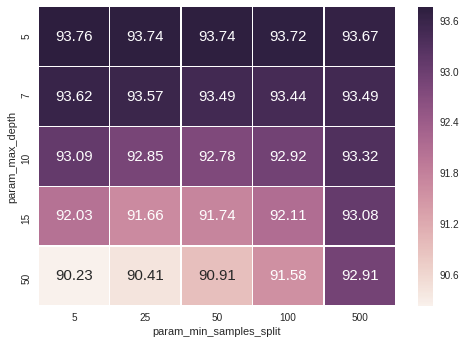

In [22]:
import seaborn as sns
sns.heatmap(test_score_heatmap,annot=True,annot_kws={"size": 15}, fmt='g',linewidths=.3)

In [23]:
print(model.best_estimator_)#printing the best_estimator

DecisionTreeClassifier(class_weight={1: 0.5, 0: 0.5}, criterion='gini',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


# <font color=DarkSlateGray>From here,the best hyperparameter value is max_depth=5<font>#

In [24]:
dt=DecisionTreeClassifier(criterion='gini', splitter='best',class_weight={1:.5,0:.5},min_samples_split=5,max_depth=5)
dt.fit(x_train_data,y_train)#fitting the model 

DecisionTreeClassifier(class_weight={1: 0.5, 0: 0.5}, criterion='gini',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# PLOTTING THE ROC CURVE FOR GETTING AUC SCORE

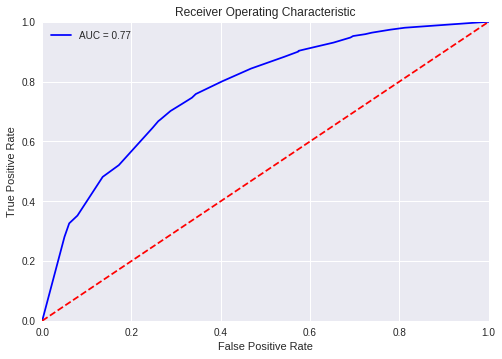

In [25]:
probs = model.predict_proba(x_test_data)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# 
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [26]:
print('FROM THE ABOVE PLOT,AUC_SCORE IS FOUND AS ',roc_auc*100)

FROM THE ABOVE PLOT,AUC_SCORE IS FOUND AS  77.36347212211996


# TESTING OUR MODEL ON TEST DATA AND CHECKING ITS PRECISION ,RECALL ,F1_FCORE

Accuracy on test set: 87.785%
Precision on test set: 0.895
Recall on test set: 0.974
F1-Score on test set: 0.933
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



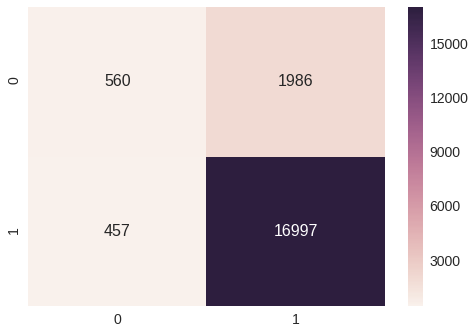

In [27]:
#Testing Accuracy on Test data  
import seaborn as sns #importing seaborn as sns
from sklearn.metrics import *#importing varoius metrics from sklearn
y_pred = dt.predict(x_test_data) 
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))#printing accuracy
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))#printing precision score
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred))) #printing recall
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred))) 
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n") 
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2)) #generating the heatmap for confusion matrix
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')


# TFIDF_AVG WORD_2_ VECTORIZATION FOR DECISION TREE IS COMPLETED 

In [0]:
# tfidf_avg word_2_vertorization is completed for decision_trees

# TABULATING VAROIUS VECTORIZATION RESULTS WITH DIFFERENT ACCURACY SCORES

In [0]:
from tabulate import tabulate

In [29]:
table = [["BOW",10,89,98,93],["TF-IDF",10,89,98,93], ["AVG_WORD_2_VEC",5,90,98,94],["TFIDF_AVG_WORD_2_VEC",5,88,98,93]]
print (tabulate(table))

--------------------  --  --  --  --
BOW                   10  89  98  93
TF-IDF                10  89  98  93
AVG_WORD_2_VEC         5  90  98  94
TFIDF_AVG_WORD_2_VEC   5  88  98  93
--------------------  --  --  --  --


In [30]:
headers=['VECTORIZATION','MAX_DEPTH','PRECISION','RECALL','F1_SCORE']
print (tabulate(table, headers, tablefmt="fancy_grid"))

╒══════════════════════╤═════════════╤═════════════╤══════════╤════════════╕
│ VECTORIZATION        │   MAX_DEPTH │   PRECISION │   RECALL │   F1_SCORE │
╞══════════════════════╪═════════════╪═════════════╪══════════╪════════════╡
│ BOW                  │          10 │          89 │       98 │         93 │
├──────────────────────┼─────────────┼─────────────┼──────────┼────────────┤
│ TF-IDF               │          10 │          89 │       98 │         93 │
├──────────────────────┼─────────────┼─────────────┼──────────┼────────────┤
│ AVG_WORD_2_VEC       │           5 │          90 │       98 │         94 │
├──────────────────────┼─────────────┼─────────────┼──────────┼────────────┤
│ TFIDF_AVG_WORD_2_VEC │           5 │          88 │       98 │         93 │
╘══════════════════════╧═════════════╧═════════════╧══════════╧════════════╛


############DECISION TREE WITH ALL FOUR VECTORIZATION   COMPLETED#################